# HR - People Analytics Project

### Solving HR Analytics and gathering information from the data.
<p>The data is from Kaggle:</p> 
<p><u>User:</u> <i>PAVANSUBHASH</i></p>
<p><u>Title:</u> <i>IBM HR Analytics Employee Attrition & Performance</i></p>
<u>Link:</u> https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=linkedin

<p>The purpose of the project is to practice my analytical skills with a real HR database, using my knowledge in <b><i>Python, Excel, and Power BI</i></b>. Machine learning techniques will be applied where possible.</p>

<p>I will analyze the data to obtain valuable insights that allow actions to be taken related to HR. Also, an attempt will be made to create a comparative of the metrics, by creating data to simulate the passing years.</p>

<p>I will work with the file <b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b>, downloaded from the Kaggle database.</p>

<p>Hypotheses will be raised, which must be confirmed or rejected by the data. The necessary dashboards will then be created to visualize the results of the hypotheses raised. Finally, the conclusions reached will be detailed.</p>


### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

# This is to ignore warnings. Was a recommendation from my friend Manuel Angel Rodriguez Rodriguez
import warnings
warnings.filterwarnings('ignore')


### 2. Importing our data file

<p>It's time to import our file <b><i>'WA_Fn-UseC_-HR-Employee-Attrition'</i></b> to work with it. This is a .csv file. First, I will explore the data, clean it, and remove those values that are not necessary to our analysis</p>

In [2]:
df_rawdata = pd.read_csv('WA_Fn_UseC_HR_Employee_Attrition.csv')
df_rawdata.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_rawdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 3 Cleaning the data

<p>In order to do data cleaning, I will remove the columns "EmployeeCount," "Over18," and "StockOptionLevel." However, prior to doing so, I will create a copy of the database "df_rawdata," allowing me to refer to the original database if necessary.<p>

##### 3.1 Copy the database

In [5]:
# The copy will be called df_padb from dataframe peopleanalyticsdatabase
df_padb = df_rawdata.copy()
df_padb.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checking for missing values
missing_values = df_padb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [7]:
# Deleting columns 'EmployeeCount', 'Over18', and 'StockOptionLevel'
df_padb.drop('EmployeeCount', axis='columns' , inplace=True)
df_padb.drop('Over18', axis='columns' , inplace=True)
df_padb.drop('StockOptionLevel', axis='columns' , inplace=True)
df_padb.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##### 3.2 Creating an ID Column

<p>Using a <u>two letter code</u> for the 'Department' and a <u>four random number</u> combination, I will make an ID for every employee.</p>

In [8]:
# First let's take a look at how many departments we have in the database
departments = df_padb['Department'].value_counts()
print(departments)

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<p>To generate the two-letter code from the <i>'Department'</i> column, I will write a function. I will then use the four random integers to form an array. In order to deploy the values into the <i>'ID'</i> column later, I will merge the two values and save them in a variable.</p>

In [9]:
# Function to create the code values for the departments
def departments_code(departments):
    if 'Research & Development' in departments:
        return 'RD'
    elif 'Sales' in departments:
        return 'SL'
    else:
        return 'HR'
    
# Now is time to create our random numbers and add them to the TempID column
random_number = np.random.randint(1000, 9999, size=len(df_padb))

# Join the two values together
new_data = df_padb['Department'].apply(departments_code) + pd.Series(random_number).astype(str)

# Inserting the new ID column with the values created lately
df_padb.insert(0, 'ID', new_data, True)

df_padb.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL5329,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,80,8,0,1,6,4,0,5
1,RD6866,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,80,10,3,3,10,7,1,7
2,RD5286,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,80,7,3,3,0,0,0,0
3,RD9649,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,80,8,3,3,8,7,3,0
4,RD4451,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,80,6,3,3,2,2,2,2


In [10]:
df_padb['ID'].dtype



dtype('O')

##### 3.3 Replacing the code numbers from columns <i>'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', and 'WorkLifeBalance'</i>

<p>To improve the understanding of the data and make working with it easier, I'll change the code numbers in those columns. I'll convert the values in this task from integer to string format, then replace the values with their references.<p>

In [11]:
# Education column
education_ref = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df_padb['Education'] = df_padb['Education'].map(education_ref)

# 'EnvironmentSatisfaction' column
environment_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['EnvironmentSatisfaction'] = df_padb['EnvironmentSatisfaction'].map(environment_satisfaction_ref)

# 'JobInvolvement' column
job_involvement_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobInvolvement'] = df_padb['JobInvolvement'].map(job_involvement_ref)

# 'JobSatisfaction' column
job_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['JobSatisfaction'] = df_padb['JobSatisfaction'].map(job_satisfaction_ref)

# 'PerformanceRating' column
performance_rating_ref = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

df_padb['PerformanceRating'] = df_padb['PerformanceRating'].map(performance_rating_ref)

# 'RelationshipSatisfaction' column
relationship_satisfaction_ref = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

df_padb['RelationshipSatisfaction'] = df_padb['RelationshipSatisfaction'].map(relationship_satisfaction_ref)

# 'WorkLifeBalance' column
wlb_ref = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}

df_padb['WorkLifeBalance'] = df_padb['WorkLifeBalance'].map(wlb_ref)

df_padb.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL5329,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,...,Excellent,Low,80,8,0,Bad,6,4,0,5
1,RD6866,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,...,Outstanding,Very High,80,10,3,Better,10,7,1,7
2,RD5286,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,...,Excellent,Medium,80,7,3,Better,0,0,0,0
3,RD9649,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,...,Excellent,High,80,8,3,Better,8,7,3,0
4,RD4451,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,...,Excellent,Very High,80,6,3,Better,2,2,2,2


##### 3.4 Exportint our data into an Excel spreadsheet

<p>Now that the data has been cleansed and the values have been replaced with their references, it is time to export the database to an Excel workbook. I will also produce a.csv file just in case.</p>

In [12]:
# Exporting the data to an Excel spreadsheet
df_padb.to_excel('imb_analytics_2021.xlsx', sheet_name='hr_analytics_2021', index=False)

# Exporting the data to a CSV file
df_padb.to_csv('ibm_hranalytics_2021.csv', index=False)

### 4 Working with the ISO 30414-2018

<p>After the data has been cleansed, it's time to utilize the ISO and begin analyzing the information to provide HR insights.</p>

##### 4.1 DIVERSITY

<p>To find out the composition and level of diversification of the firm, I will work using the information provided in the ISO.<p>

##### 4.1.a Creating the column with the age range

<p>Before starting to work with the data, I'm going to create an age range to simplify the work and establish a better understanding of the different generations that make up our company</p>

In [13]:
# Function to create the age range
def age_range(age):
    if age >= 18 and age <= 27:
        return '18 to 27'
    elif age >= 28 and age <= 37:
        return '28 to 37'
    elif age >= 38 and age <= 47:
        return '38 to 47'
    elif age >= 48 and age <= 57:
        return '48 to 57'
    else:
        return 'more than 58'

# New data    
new_age_data = df_padb['Age'].apply(lambda x: pd.Series(age_range(x)))
# print(new_age_data)

# Inserting the new column into the dataframe
df_padb.insert(loc=df_padb.columns.get_loc('Age')+1, column='AgeRange', value=new_age_data)
df_padb.head()

,ID,Age,AgeRange,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,SL5329,41,38 to 47,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,...,Excellent,Low,80,8,0,Bad,6,4,0,5
1,RD6866,49,48 to 57,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,...,Outstanding,Very High,80,10,3,Better,10,7,1,7
2,RD5286,37,28 to 37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,...,Excellent,Medium,80,7,3,Better,0,0,0,0
3,RD9649,33,28 to 37,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,...,Excellent,High,80,8,3,Better,8,7,3,0
4,RD4451,27,18 to 27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,...,Excellent,Very High,80,6,3,Better,2,2,2,2


##### 4.1.b Analysing the data and creating the plots

<p> With the age range column in place, let's review the data and identify the factors required to create the charts that illustrate the impact of diversity on our organization. I'm going to create a narrative for every one of these: <i>study field, study level, gender, and age range</i>. We will be able to see the variety of worker diversity inside our company as a result.
<p> Gaining an understanding of the <u>diversity of our business</u> will help us create a more diverse workplace and set policies for future hiring.<p>
<p>I'll use matplotlib for the plots.</p>

In [14]:
import matplotlib.pyplot as plt

##### 4.1.b.1 Gender

<p>Let's now examine the gender distribution by looking at the <i>'Gender' column</i>. The gender distribution gives us an overview of how gender is spread throughout our business, which will be helpful for future recruitment efforts.<p>

Male      882
Female    588
Name: Gender, dtype: int64


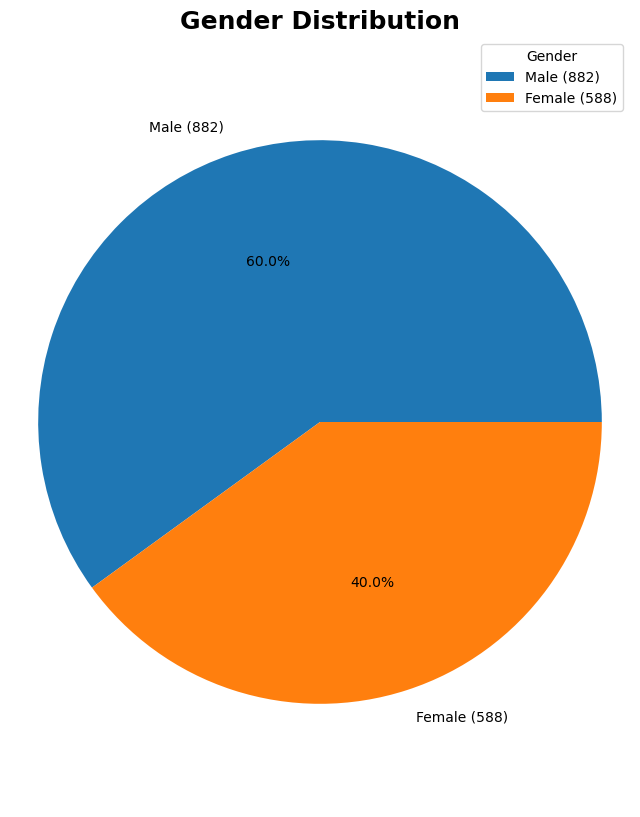

In [15]:
# Counting the gender values and storage them into a variable
gender_counts = df_padb['Gender'].value_counts()
print(gender_counts)

# Total and percentage variables to use on our charts
total_count = gender_counts.sum()
gender_percentage = (gender_counts / total_count) * 100

# labels = gender_counts.index
# Using a function to create the labels
labels = [f'{gender} ({count})' for gender, count in zip(gender_counts.index, gender_counts)]

# Chart size
fig, ax = plt.subplots(figsize=(8, 10))

# Chart generation
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender')
ax.set_title('Gender Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.2 Age Distribution

<p>Let's now examine the distribution of ages in the <i>'AgeRange' column</i>. Examine our company's distribution structure and age.<p>

28 to 37        638
38 to 47        406
18 to 27        210
48 to 57        187
more than 58     29
Name: AgeRange, dtype: int64


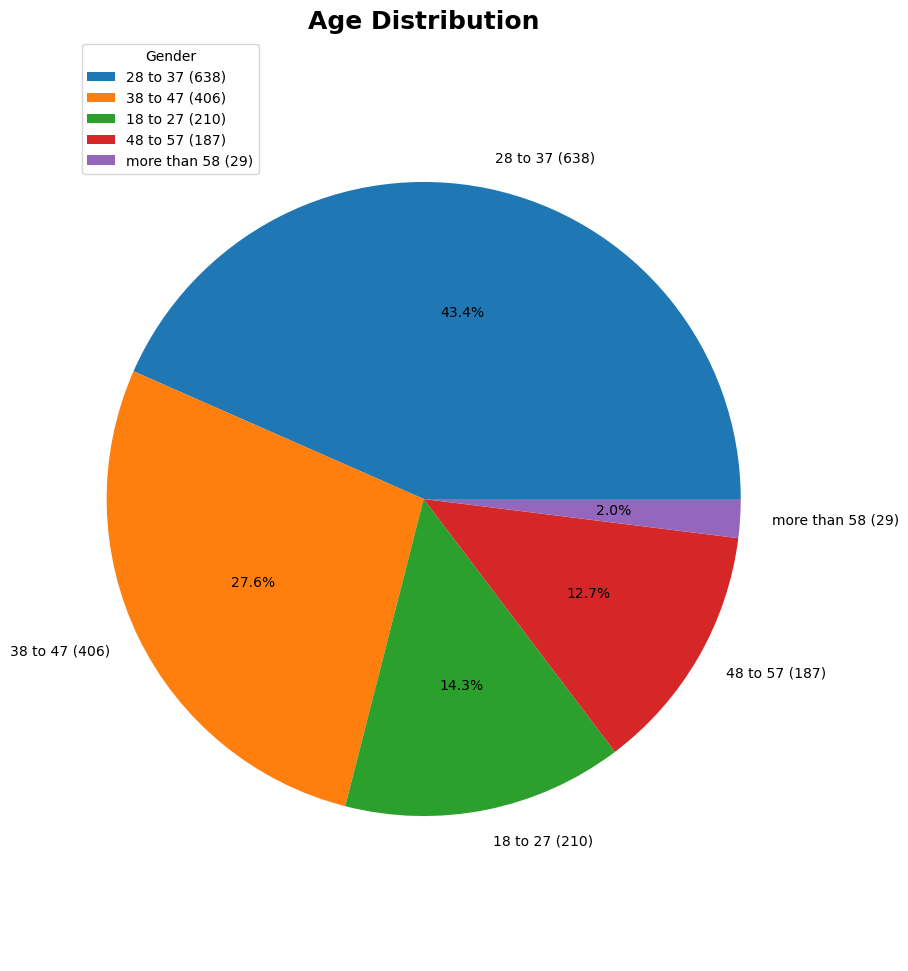

In [16]:
age_range_count = df_padb['AgeRange'].value_counts()
print(age_range_count)

total_age_count = age_range_count.sum()
age_percentage = (age_range_count / total_age_count) * 100

labels = [f'{age} ({count})' for age, count in zip(age_range_count.index, age_range_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(age_range_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender', loc= 'upper left')
ax.set_title('Age Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3 More Distributions

<p>What level of training and education do our employees have? I would like to know if workers need assistance in improving their academic achievement. For this task, the columns "Education" and "EducationField"</i> will be used by me.<p>

##### 4.1.b.3.a Education Distribution

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


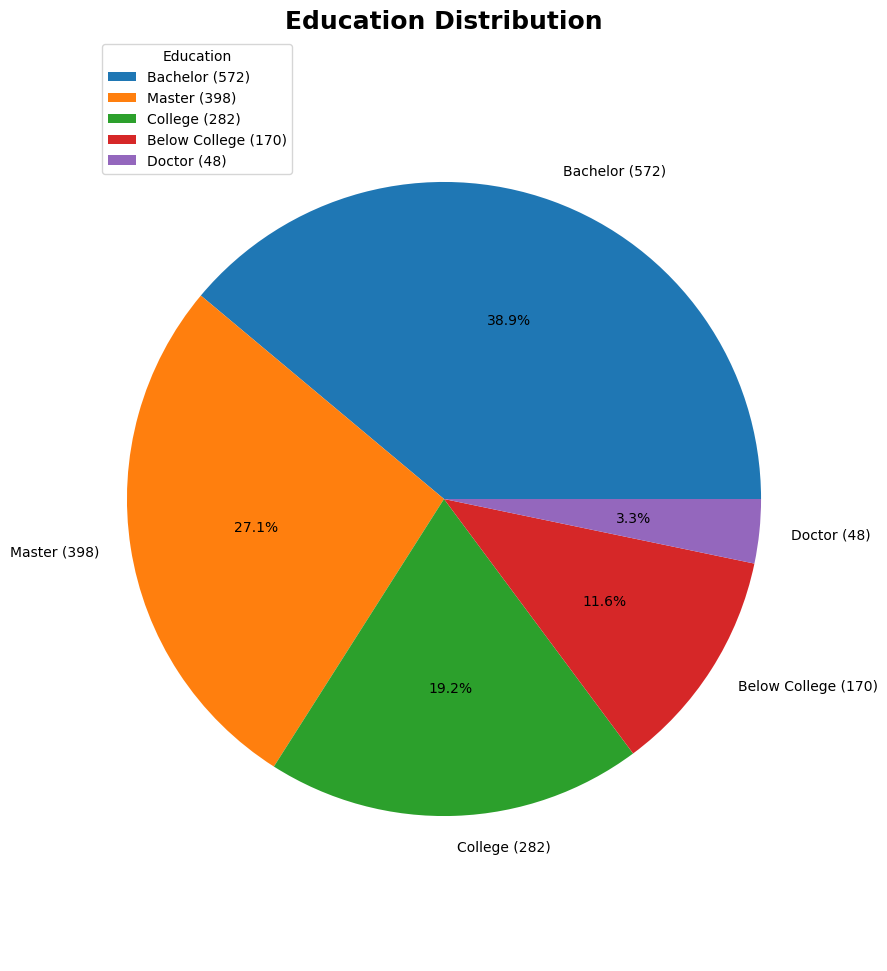

In [17]:
education_count = df_padb['Education'].value_counts()
print(education_count)

total_education_count = education_count.sum()
education_percentage = (education_count / total_education_count) * 100

labels = [f'{education} ({count})' for education, count in zip(education_count.index, education_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(education_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Education', loc= 'upper left')
ax.set_title('Education Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.b.3.b Field Education Distribution

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


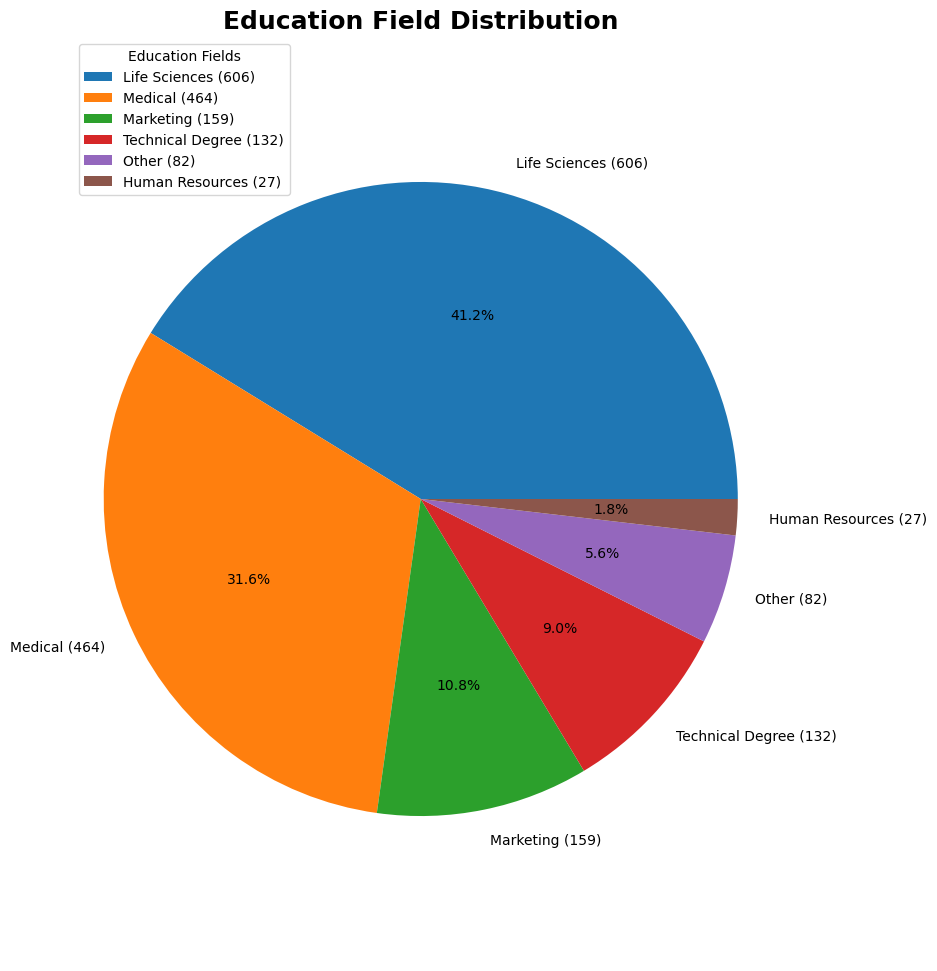

In [18]:
educationfield_count = df_padb['EducationField'].value_counts()
print(educationfield_count)

total_educationfield_count = educationfield_count.sum()
educationfield_percentage = (educationfield_count / total_educationfield_count) * 100

labels = [f'{education} ({count})' for education, count in zip(educationfield_count.index, educationfield_count)]

fig, ax = plt.subplots(figsize=(9, 12))


plt.pie(educationfield_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Education Fields', loc= 'upper left')
ax.set_title('Education Field Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

##### 4.1.c Appendix

<p>I compute certain numbers in this appendix for use in upcoming analyses. Recall that in the future, we want to <i>compare and understand how diversity evolves throughout time</i>.</p>

In [19]:
# Calculate the employees average age
age_info = df_padb['Age'].describe()
print(age_info)

age_sum = df_padb['Age'].mean().round(0)
print("\nThe average Age is:")
print(age_sum)

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

The average Age is:
37.0


##### 4.2 JOB SATISFACTION

<p>Let's examine employee satisfaction levels across the company's different roles. Which role has the greatest or lowest degree of contentment? With this metric, we can identify those roles where satisfaction is low, discover what is causing the low levels, and design or create strategies to improve it.</p>

<p>I'll start by tallying the distribution of the satisfaction categories.</p>

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64


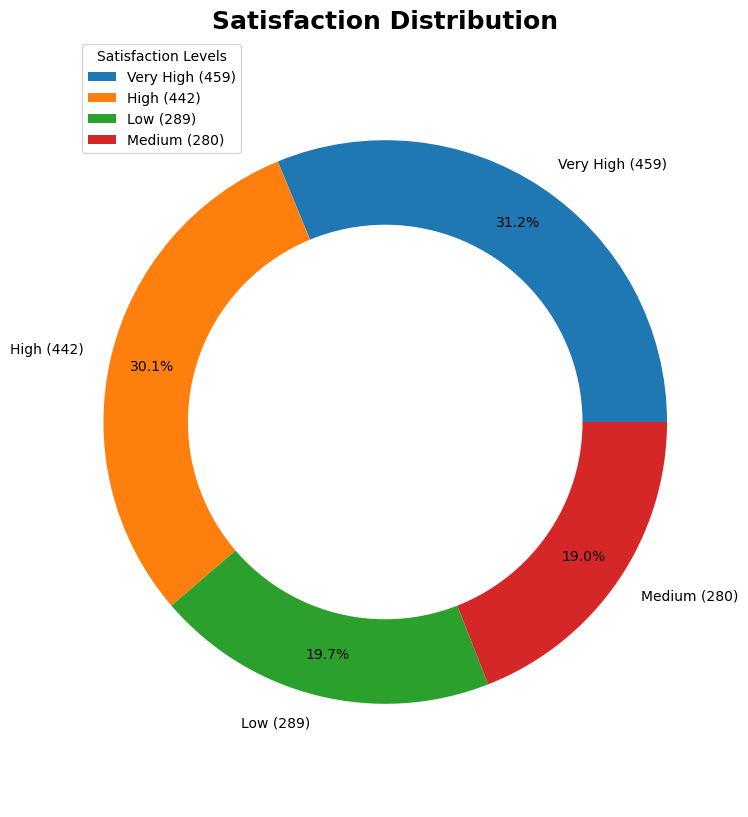

In [20]:
# Count the satisfaction categories.
job_satisfaction_count = df_padb['JobSatisfaction'].value_counts()
print(job_satisfaction_count)

job_satisfaction_total = df_padb['JobSatisfaction'].sum()

labels = [f'{jobsatisfaction} ({count})' for jobsatisfaction, count in zip(job_satisfaction_count.index, job_satisfaction_count)]

fig, ax = plt.subplots(figsize=(8, 10))

plt.pie(job_satisfaction_count, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
plt.legend(title='Satisfaction Levels', loc= 'upper left')
ax.set_title('Satisfaction Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.show()

<p>The data shows that <b><i>19,7%</i></b> of the employees have <u>low</u> satisfaction with their job. I will identify which of the roles are not so satisfied with their job</p>

In [21]:
# With a pivot table, I will identify the responses for each department about their job satisfaction
pivot = pd.pivot_table(df_padb[['Department', 'JobSatisfaction']], index='Department', columns='JobSatisfaction', aggfunc=len, fill_value=0)
print("Pivot Table with Counts:")
print(pivot)

# Let's calculate the percentage of satisfaction for each department and their category
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0).round(2) * 100

# Define the desired order of values
desired_order = ['Low', 'Medium', 'High', 'Very High']

# Reindex the DataFrame to specify the desired order
pivot_percentage_ordered = pivot_percentage.reindex(desired_order, axis=1)

print("\nPivot Table with Percentages:")
print(pivot_percentage)

Pivot Table with Counts:
JobSatisfaction         High  Low  Medium  Very High
Department                                          
Human Resources           15   11      20         17
Research & Development   300  192     174        295
Sales                    127   86      86        147

Pivot Table with Percentages:
JobSatisfaction         High   Low  Medium  Very High
Department                                           
Human Resources         24.0  17.0    32.0       27.0
Research & Development  31.0  20.0    18.0       31.0
Sales                   28.0  19.0    19.0       33.0


<p>Let's create a chart to visualize our data.</p>

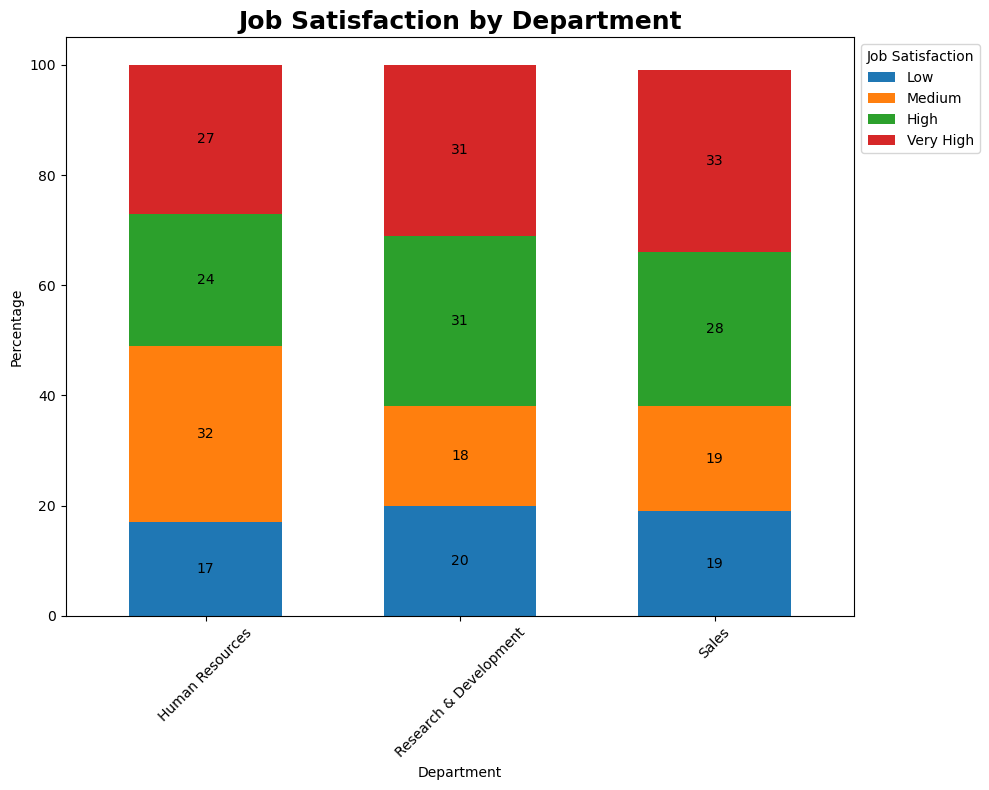

In [22]:
# Because the data is displayed out of order, we reorder the index to fix this


# Creating the chart to visualize our data
ax = pivot_percentage_ordered.plot(kind='bar', stacked=True, figsize=(10, 8), width=0.6)

# Adding the values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('Job Satisfaction by Department', fontsize=18, fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<p>Previously, looking at the overall percentage among departments, <u>we found that 19.7% of all employees have a low motivation with their work.</u></p>
<p>In order to have a more detailed report, I proceeded to break down by department in order to know more deeply the dissatisfaction with the work. We have to keep in mind that out of <i>1470 employees, 63 belong to the HRD department, 961 to the Research and Development department and 446 to Sales</i>. The percentages of dissatisfaction between the three departments were very similar. <i>RRHH</i> presented a <b>17%</b> about 11 employees, <i>R&D</i> a total of <b>20%</b> about 192 employees and <i>Sales</i> total of <b>19%</b> about 86 employees.</p>
<p>We can indicate that in the <i>R&D department</i> we have the largest number of employees who are dissatisfied or low motivated with their work. It is recommended to investigate what is causing this and find some solutions.</p>
<p>I would like to make an assessment: <i>in RRHH there are 17% of employees with low motivation and 32% with medium motivation</i>. It is recommended to follow up to see if these indices are rising because we would have most half of the department with a low motivation with their tasks. While the other two departments showed high rates of average and high satisfaction with their work.</p>

##### 4.2.a Appendix

<p>In order to further my investigation, I choose to find out how many of them are <b>"Very High"</b> invested in their work and what proportion of them have <b>"Low"</b> motivation. I will identify the employees who exhibit <b>"Low"</b> motivation by utilizing the <i>'JobInvolvement'</i> column. Those with <b>"High"</b> participation and <b>"Low"</b> satisfaction will also be examined by me.</p>

In [23]:
# Create a copy of the columns to work better with them
job_db = df_padb[['JobInvolvement', 'JobSatisfaction']].copy()

# Filtering the data
jobFilteredData_VHL = job_db[(job_db['JobInvolvement'] == 'Very High') & (job_db['JobSatisfaction'] == 'Low')]
jobFilteredData_HL = job_db[(job_db['JobInvolvement'] == 'High') & (job_db['JobSatisfaction'] == 'Low')]

# Counting the filtered data.
countVH_Low = jobFilteredData_VHL.shape[0]        
countH_Low = jobFilteredData_HL.shape[0]        
print("The total number of employees with Very High Job Involvement and Low Job Satisfaction is: ", countVH_Low)
print("The total number of employees with High Job Involvement and Low Job Satisfaction is: ", countH_Low)

# Percentage they represent
percentageVH_Low = countVH_Low / len(df_padb) * 100
percentageH_Low = countH_Low / len(df_padb) * 100
print('The employees with Very High Job Involvement and Low Job Satisfaction represents a percentage of: ', round(percentageVH_Low, 2))
print('The employees with High Job Involvement and Low Job Satisfaction represents a percentage of: ', round(percentageH_Low, 2))

The total number of employees with Very High Job Involvement and Low Job Satisfaction is:  34
The total number of employees with High Job Involvement and Low Job Satisfaction is:  166
The employees with Very High Job Involvement and Low Job Satisfaction represents a percentage of:  2.31
The employees with High Job Involvement and Low Job Satisfaction represents a percentage of:  11.29


##### 4.3 CAREER PROGRESSION

<p>Is there decent career growth at the company? Through data analysis, my goal is to ascertain whether the organization provides its employees with a decent opportunity for professional advancement. Can this be related to low work satisfaction?. I will use for the analysis the data from the column 'YearsAtCompany'.</p>

In [24]:
df_total_records = len(df_padb)
print(df_total_records)

1470


By department there are the following number of employees:  
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


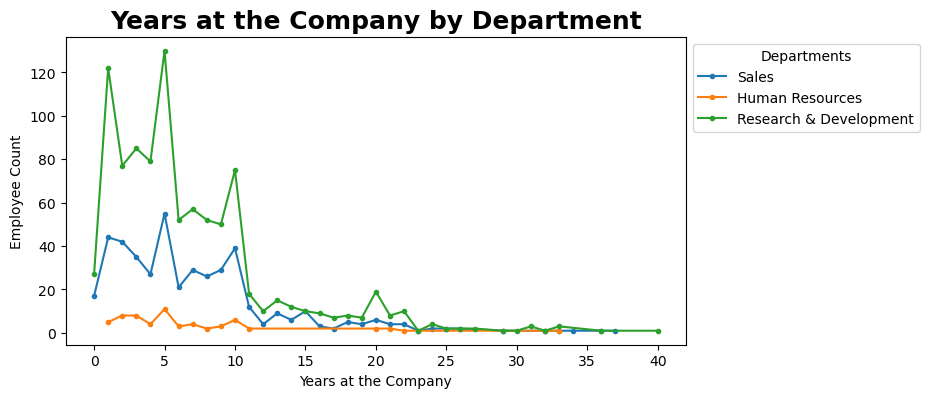

In [25]:
departments_count = df_padb['Department'].value_counts()
print('By department there are the following number of employees: ', "\n", departments_count)
# Preparing the data
sales_count = df_padb[df_padb['Department'] == 'Sales'].groupby('YearsAtCompany').size()
rrhh_count = df_padb[df_padb['Department'] == 'Human Resources'].groupby('YearsAtCompany').size()
rd_count = df_padb[df_padb['Department'] == 'Research & Development'].groupby('YearsAtCompany').size()

# Creating the line plot
plt.figure(figsize=(8, 4))

# Ploting the lines
plt.plot(sales_count.index, sales_count.values, label='Sales', marker='o', ms = 3)
plt.plot(rrhh_count.index, rrhh_count.values, label='Human Resources', marker='o', ms = 3)
plt.plot(rd_count.index, rd_count.values, label='Research & Development', marker='o', ms = 3)

# Adding Labels
plt.xlabel('Years at the Company')
plt.ylabel('Employee Count')
plt.title('Years at the Company by Department', fontsize=18, fontweight='bold')
plt.legend(title='Departments', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


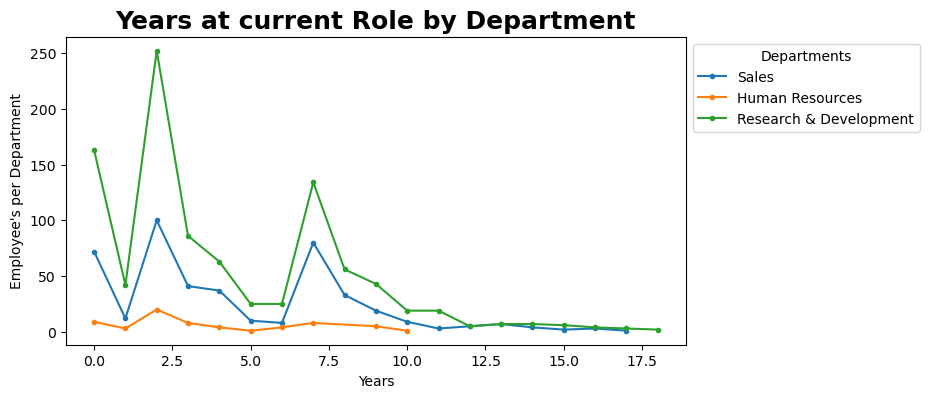

In [26]:
# Preparing the data
sales_count_cr = df_padb[df_padb['Department'] == 'Sales'].groupby('YearsInCurrentRole').size()
rrhh_count_cr = df_padb[df_padb['Department'] == 'Human Resources'].groupby('YearsInCurrentRole').size()
rd_count_cr = df_padb[df_padb['Department'] == 'Research & Development'].groupby('YearsInCurrentRole').size()

# Creating the line plot
plt.figure(figsize=(8, 4))

# Ploting the lines
plt.plot(sales_count_cr.index, sales_count_cr.values, label='Sales', marker='o', ms = 3)
plt.plot(rrhh_count_cr.index, rrhh_count_cr.values, label='Human Resources', marker='o', ms = 3)
plt.plot(rd_count_cr.index, rd_count_cr.values, label='Research & Development', marker='o', ms = 3)

# Adding Labels
plt.xlabel('Years')
plt.ylabel("Employee's per Department")
plt.title('Years at current Role by Department', fontsize=18, fontweight='bold')
plt.legend(title='Departments', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [27]:
average_years = df_padb['YearsAtCompany'].mean().round()
average_years_at_role = df_padb['YearsInCurrentRole'].mean().round()
average_years_promotion = df_padb['YearsSinceLastPromotion'].mean().round()
max_years_in_role = df_padb['YearsInCurrentRole'].max()

print(
    "Average years at the Company: ", average_years, "\n",
    "Average years at a Role: ", average_years_at_role, "\n",
    "Average Years since last Promotion: ", average_years_promotion, "\n",
    "Max Years in a Role: ", max_years_in_role)
# print(max_years_in_role)

Average years at the Company:  7.0 
 Average years at a Role:  4.0 
 Average Years since last Promotion:  2.0 
 Max Years in a Role:  18


<p>Most employees are <i>between 0 and 10 years working for the company</i>. And we can see that it <u>decreases</u> significantly after ten years. So I tried to figure out <i>how long the average employee stays in the company</i> and found out that it's <u>7 years</u>, with <i>4 years on average working in the same position</i>. Then I decided to investigate the company's promotion system and found out that our company has an <u>average of two years to grant promotions</u>.</p>
<p>A <u>first promotion</u> can be seen <i>around 2 years</i> after joining the company, and then a <u>second promotion</u> can be seen <i>5 years</i> later. Then there may be a change of business, or the person may continue to work in the position until his retirement.</p>
<p>For more information, the maximum number of years in a single role was examined. It was found that the <i>longest duration in a position is <b>18 years</b></i>.</p>


##### 4.4 COMPENSATION ANALYSIS

<p>It's time to analyze <i>whether there is a <u>significant disparity</u> between <b>employee salaries</b> and <b>educational attainment</b></i>.
<i>'MonthlyIncome'</i> values will be used, and the values will be distributed according to the values in the <i>'Education'</i> column.</p>

In [28]:
# To facilitate our work, I will create a table with the required columns 'MonthlyIncome' and 'Education'.
df_monthedu = df_padb[['MonthlyIncome', 'Education']].copy()
df_monthedu.head()

,MonthlyIncome,Education
0,5993,College
1,5130,Below College
2,2090,College
3,2909,Master
4,3468,Below College


<p>It's time to work with our new data frame. Let us calculate the median for every category of education.</p>

In [29]:
# First, let's calculate the median from the 'MonthlyIncome' column.
monthlyIncome_median = df_monthedu['MonthlyIncome'].median()

# Second, let's calculate the median for each category of education
below_college_median = df_monthedu[df_monthedu['Education'] == 'Below College'].groupby('Education').median()
college_median = df_monthedu[df_monthedu['Education'] == 'College'].groupby('Education').median()
bachelor_median= df_monthedu[df_monthedu['Education'] == 'Bachelor'].groupby('Education').median()
master_median = df_monthedu[df_monthedu['Education'] == 'Master'].groupby('Education').median()
doctor_median = df_monthedu[df_monthedu['Education'] == 'Doctor'].groupby('Education').median()
print(
    "The median for Below College Education is: ", below_college_median.values, "\n",
    "The median for College Education is: ", college_median.values, "\n",
    "The median for Bachelor Education is: ", bachelor_median.values, "\n",
    "The median for Master Education is: ", master_median.values, "\n",
    "The median for Doctor Education is: ", doctor_median.values, "\n",
    'The median for the "MonthlyIncome" column is: ', monthlyIncome_median )

The median for Below College Education is:  [[3849.]] 
 The median for College Education is:  [[4891.5]] 
 The median for Bachelor Education is:  [[4762.]] 
 The median for Master Education is:  [[5341.5]] 
 The median for Doctor Education is:  [[6203.]] 
 The median for the "MonthlyIncome" column is:  4919.0


<p>To see our data, let's make some charts. I will use a <i><b>Bar chart</b></i> to compare the monthly income median of each education level.</p>

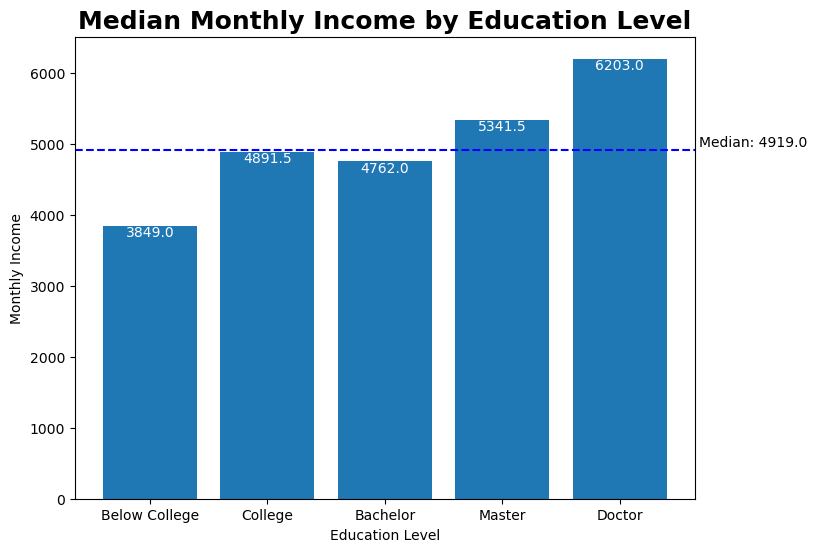

In [65]:
# Let's create the Bar chart
plt.figure(figsize = (8, 6))

# Adding the variables
bar_data = [below_college_median['MonthlyIncome'].values[0],
            college_median['MonthlyIncome'].values[0],
            bachelor_median['MonthlyIncome'].values[0],
            master_median['MonthlyIncome'].values[0],
            doctor_median['MonthlyIncome'].values[0]]
education_cat = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Adding the labels
for i, value in enumerate(bar_data):
    plt.text(i, value, str(value), ha='center', va='top', color='white')
    
# Add the average line
plt.axhline(monthlyIncome_median, color='blue', linestyle='--', label='Media')

# Add the value of the average to the line
plt.text(len(education_cat) + 0.6, monthlyIncome_median, f'Median: {monthlyIncome_median}', ha='right', va='bottom', color='black')

# Joining the data to create the chart
plt.bar(education_cat, bar_data)
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.title('Median Monthly Income by Education Level', fontsize=18, fontweight='bold')
plt.show()

<p>Employees with a bachelor's degree have less income than those with a college degree, according to the findings when viewed using the median. But keep in mind that we have more employees with bachelor's degrees than the college does, so I'll check to see if the mean exhibits the same abnormality.<p>

In [31]:
# First, let's calculate the mean from the 'MonthlyIncome' column.
monthlyIncome_mean = df_monthedu['MonthlyIncome'].mean().round(2)

# Second, let's calculate the mean for each category of education
below_college_mean = df_monthedu[df_monthedu['Education'] == 'Below College'].groupby('Education').mean().round(2)
college_mean = df_monthedu[df_monthedu['Education'] == 'College'].groupby('Education').mean().round(2)
bachelor_mean= df_monthedu[df_monthedu['Education'] == 'Bachelor'].groupby('Education').mean().round(2)
master_mean = df_monthedu[df_monthedu['Education'] == 'Master'].groupby('Education').mean().round(2)
doctor_mean = df_monthedu[df_monthedu['Education'] == 'Doctor'].groupby('Education').mean().round(2)
print(
    "The mean for Below College Education is: ", below_college_mean.values, "\n",
    "The mean for College Education is: ", college_mean.values, "\n",
    "The mean for Bachelor Education is: ", bachelor_mean.values, "\n",
    "The mean for Master Education is: ", master_mean.values, "\n",
    "The mean for Doctor Education is: ", doctor_mean.values, "\n",
    'The mean for the "MonthlyIncome" column is: ', monthlyIncome_mean )

The mean for Below College Education is:  [[5640.57]] 
 The mean for College Education is:  [[6226.65]] 
 The mean for Bachelor Education is:  [[6517.26]] 
 The mean for Master Education is:  [[6832.4]] 
 The mean for Doctor Education is:  [[8277.65]] 
 The mean for the "MonthlyIncome" column is:  6502.93


<p>I can establish that employees with a bachelor's degree have more income than those with a college degree by looking at the mean. The business is doing well, but it's crucial to note that certain Bacherlor employees <u>are not getting paid enough</u>. The <u>mean</u> for the <i>Bachelor's degree</i> is <b>6517,26</b> against the <b>6226,65</b> from the <i>College degree</i>.<p>

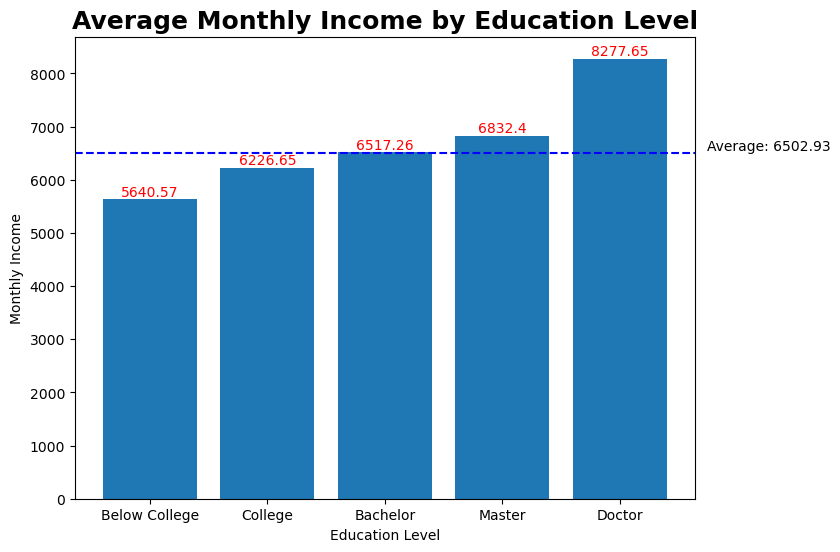

In [69]:
# Let's create the Bar chart
plt.figure(figsize = (8, 6))

# Adding the variables
bar_mean_data = [below_college_mean['MonthlyIncome'].values[0],
            college_mean['MonthlyIncome'].values[0],
            bachelor_mean['MonthlyIncome'].values[0],
            master_mean['MonthlyIncome'].values[0],
            doctor_mean['MonthlyIncome'].values[0]]
education_cat = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

# Adding the labels
for i, value in enumerate(bar_mean_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')
    
# Add the average line
plt.axhline(monthlyIncome_mean, color='blue', linestyle='--', label='Media')

# Add the value of the average to the line
plt.text(len(education_cat) + 0.8, monthlyIncome_mean, f'Average: {monthlyIncome_mean}', ha='right', va='bottom', color='black')

# Joining the data to create the chart
plt.bar(education_cat, bar_mean_data)
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.title('Average Monthly Income by Education Level', fontsize=18, fontweight='bold')
plt.show()

##### 4.4 TRAINING AND DEVELOPMENT

<p>Continuing with our descriptive analysis, I will explore the years the company has committed to providing training to their employees in each department. I will make an effort to identify potential areas to improve the training and which departments could benefit more.</p>

In [32]:
# To facilitate our work, I will create a table with the required columns 'MonthlyIncome' and 'Education'.
df_yearsTraining = df_padb[['Department', 'TrainingTimesLastYear']].copy()
df_yearsTraining.head()

,Department,TrainingTimesLastYear
0,Sales,0
1,Research & Development,3
2,Research & Development,3
3,Research & Development,3
4,Research & Development,3


In [33]:
yearsTraining_average = df_yearsTraining['TrainingTimesLastYear'].mean().round(2)

# Second, let's calculate the average years commited in training for each department
sales_training_average = df_yearsTraining[df_yearsTraining['Department'] == 'Sales'].groupby('Department').mean().round(2)
rrhh_training_average = df_yearsTraining[df_yearsTraining['Department'] == 'Human Resources'].groupby('Department').mean().round(2)
rd_training_average= df_yearsTraining[df_yearsTraining['Department'] == 'Research & Development'].groupby('Department').mean().round(2)

print(
    "The average training time dedicated in Sales is: ", sales_training_average.values, "\n",
    "The average training time dedicated in Human Resources is: ", rrhh_training_average.values, "\n",
    "The average training time dedicated in Research & Development is: ", rd_training_average.values, "\n",
    'The average years for the "TrainingTimeLastYear" column is: ', yearsTraining_average )

The average training time dedicated in Sales is:  [[2.85]] 
 The average training time dedicated in Human Resources is:  [[2.56]] 
 The average training time dedicated in Research & Development is:  [[2.79]] 
 The average years for the "TrainingTimeLastYear" column is:  2.8


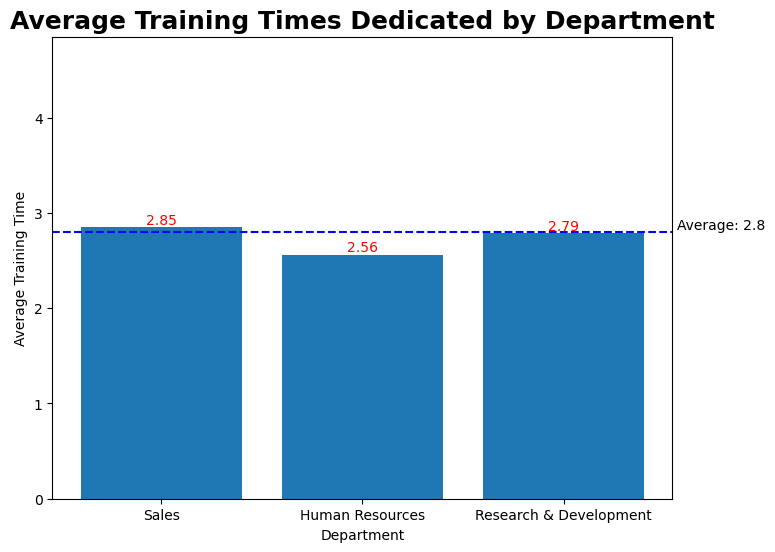

In [47]:
# Let's create the Bar chart
plt.figure(figsize = (8, 6))

# Adding the variables
bar_training_data = [sales_training_average['TrainingTimesLastYear'].values[0],
            rrhh_training_average['TrainingTimesLastYear'].values[0],
            rd_training_average['TrainingTimesLastYear'].values[0]
        ]
department_cat = ['Sales', 'Human Resources', 'Research & Development']

# Adding the labels
for i, value in enumerate(bar_training_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')
    
# Add the average line
plt.axhline(yearsTraining_average, color='blue', linestyle='--', label='Average Training Times')

# Add the value of the average to the line
plt.text(len(department_cat), yearsTraining_average, f'Average: {yearsTraining_average}', ha='right', va='bottom', color='black')

# Adjust y-axis limits to ensure the line is visible
plt.ylim(0, max(bar_training_data) + 2)

# Joining the data to create the chart
plt.bar(department_cat, bar_training_data)
plt.xlabel('Department')
plt.ylabel('Average Training Time')
plt.title('Average Training Times Dedicated by Department', fontsize=18, fontweight='bold')
plt.show()

In [35]:
# Second, let's calculate the average years commited in training for each department
sales_training_sum = df_yearsTraining[df_yearsTraining['Department'] == 'Sales'].groupby('Department').sum()
rrhh_training_sum = df_yearsTraining[df_yearsTraining['Department'] == 'Human Resources'].groupby('Department').sum()
rd_training_sum= df_yearsTraining[df_yearsTraining['Department'] == 'Research & Development'].groupby('Department').sum()

print(
    "The total training time dedicated in Sales is: ", sales_training_sum.values, "\n",
    "The total training time dedicated in Human Resources is: ", rrhh_training_sum.values, "\n",
    "The total training time dedicated in Research & Development is: ", rd_training_sum.values, "\n",
    'The total years for the "TrainingTimeLastYear" column is: ', yearsTraining_average )

The total training time dedicated in Sales is:  [[1270]] 
 The total training time dedicated in Human Resources is:  [[161]] 
 The total training time dedicated in Research & Development is:  [[2684]] 
 The total years for the "TrainingTimeLastYear" column is:  2.8


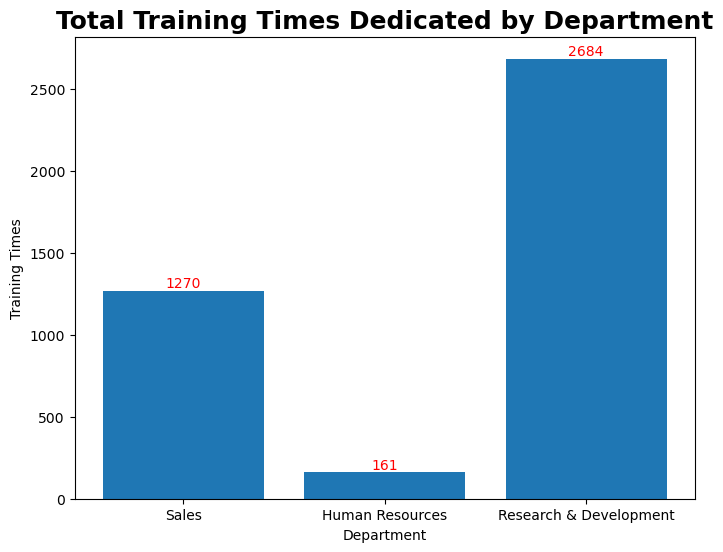

In [36]:
# Let's create the Bar chart
plt.figure(figsize = (8, 6))

# Adding the variables
bar_training_data = [sales_training_sum['TrainingTimesLastYear'].values[0],
            rrhh_training_sum['TrainingTimesLastYear'].values[0],
            rd_training_sum['TrainingTimesLastYear'].values[0]
        ]
department_cat = ['Sales', 'Human Resources', 'Research & Development']

# Adding the labels
for i, value in enumerate(bar_training_data):
    plt.text(i, value, str(value), ha='center', va='bottom', color='red')

# Joining the data to create the chart
plt.bar(department_cat, bar_training_data)
plt.xlabel('Department')
plt.ylabel('Training Times')
plt.title('Total Training Times Dedicated by Department', fontsize=18, fontweight='bold')
plt.show()

##### 4.5   WORK-LIFE BALANCE AND OVERTIME ANALYSIS

<p>These days, evaluating the <i><b>workers' work-life balance</b></i> is among the most crucial evaluations. Let's investigate if they are working too much and whether they are able to make up for their job hours with their free time. Recall that most <i>workers value a healthy work-life balance</i>, particularly in light of the <u>growing popularity of remote employment</u>. <p>

In [73]:
df_wlb = df_padb[['OverTime', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'DistanceFromHome']].copy()
df_wlb.head()

,OverTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,DistanceFromHome
0,Yes,Medium,Very High,Bad,Travel_Rarely,1
1,No,High,Medium,Better,Travel_Frequently,8
2,Yes,Very High,High,Better,Travel_Rarely,2
3,Yes,Very High,High,Better,Travel_Frequently,3
4,No,Low,Medium,Better,Travel_Rarely,2


No     1054
Yes     416
Name: OverTime, dtype: int64


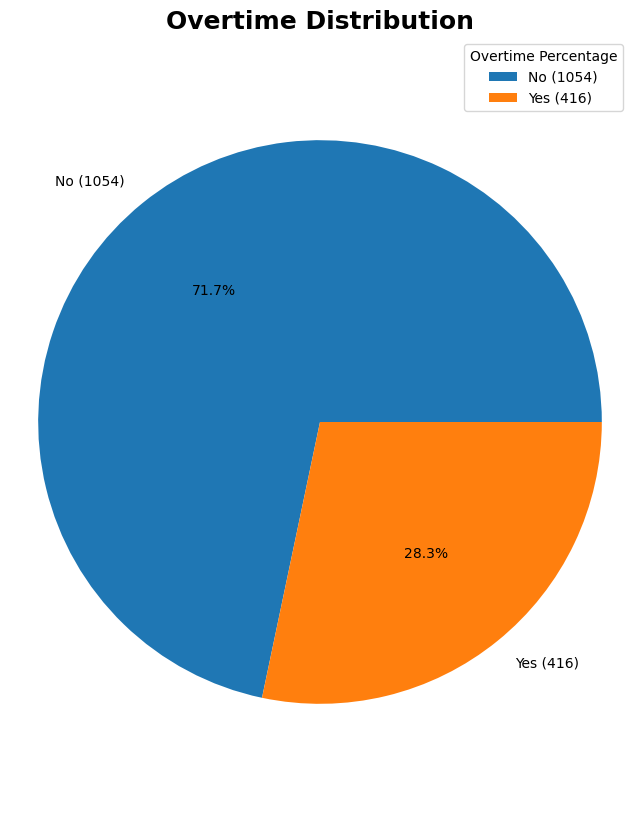

In [74]:
# Let's analyze the data from the OverTime column
overtime_count = df_wlb['OverTime'].value_counts()
print(overtime_count)

# Total and percentage variables to use on our charts
total_overtime_count = overtime_count.sum()
overtime_percentage = (overtime_count / total_count) * 100

# labels = gender_counts.index
# Using a function to create the labels
labels = [f'{overtime} ({count})' for overtime, count in zip(overtime_count.index, overtime_count)]

# Chart size
fig, ax = plt.subplots(figsize=(8, 10))

# Chart generation
plt.pie(overtime_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Overtime Count')
ax.set_title('Overtime Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

<p>A review of the <i>'OverTime'</i> column data reveals that just <b>28.3%</b> of our staff members work overtime. It <u>is not possible</u> to ascertain how an employee's work-life balance <u>is impacted by overtime</u>. In order to obtain a useful result, I thus choose to look at the numbers in the <i>"WorkLifeBalance"</i> column.<p>

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64


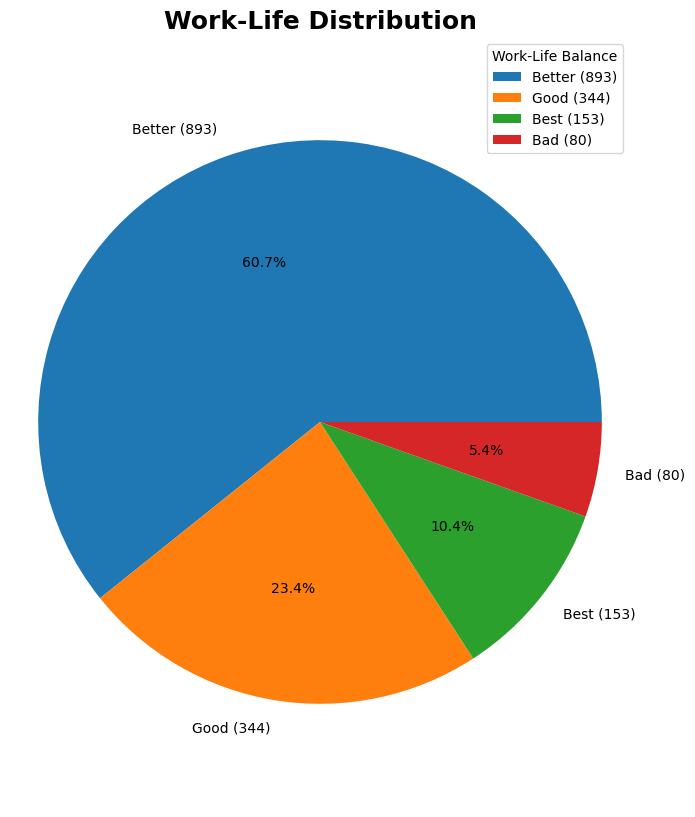

In [75]:
# Let's analyze the data from the OverTime column
wlbalance_count = df_wlb['WorkLifeBalance'].value_counts()
print(wlbalance_count)

# Total and percentage variables to use on our charts
total_wlbalance_count = wlbalance_count.sum()
wlbalance_percentage = (wlbalance_count / total_count) * 100

# labels = gender_counts.index
# Using a function to create the labels
labels = [f'{wlbalance} ({count})' for wlbalance, count in zip(wlbalance_count.index, wlbalance_count)]

# Chart size
fig, ax = plt.subplots(figsize=(8, 10))

# Chart generation
plt.pie(wlbalance_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Work-Life Balance')
ax.set_title('Work-Life Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

<p>More pertinent information about our employees' appreciation of work-life balance was found in the 'WorkLifeBalance' column. According to my research, <b>5.4%</b> of workers think that <u>there is not a good work-life balance</u>. I'm now attempting to determine whether there is <u>another factor</u> influencing them. Let's take a look at the data in the <i>'EnvironmentSatisfaction'</i> column.<p>

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64


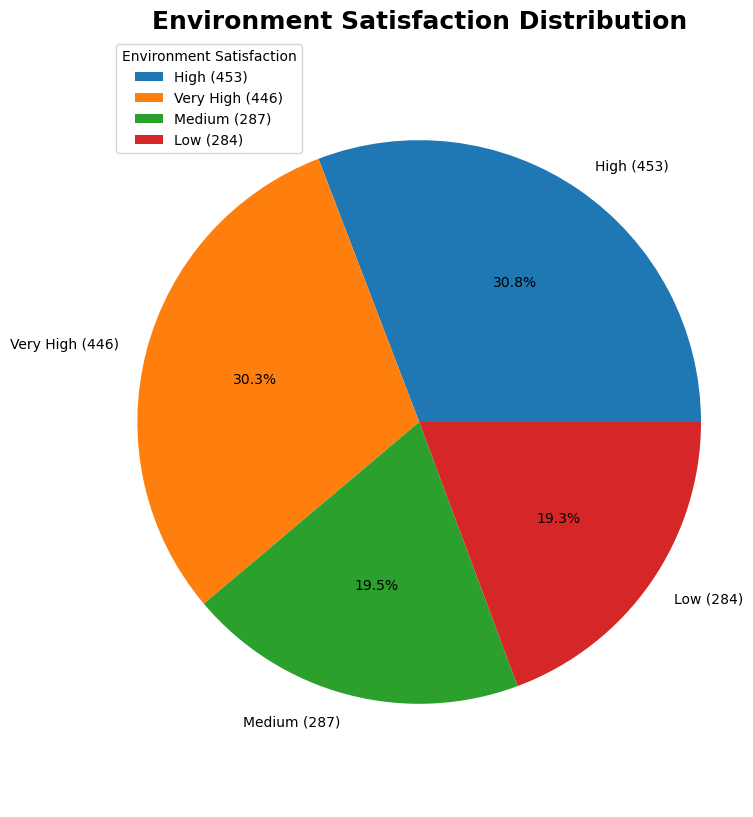

In [79]:
envSatisfac_count = df_wlb['EnvironmentSatisfaction'].value_counts()
print(envSatisfac_count)

# Total and percentage variables to use on our charts
total_envSatisfac_count = envSatisfac_count.sum()
envSatisfac_percentage = (envSatisfac_count / total_count) * 100

# labels = gender_counts.index
# Using a function to create the labels
labels = [f'{envSatisfac} ({count})' for envSatisfac, count in zip(envSatisfac_count.index, envSatisfac_count)]

# Chart size
fig, ax = plt.subplots(figsize=(8, 10))

# Chart generation
plt.pie(envSatisfac_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Environment Satisfaction', loc='upper left')
ax.set_title('Environment Satisfaction Distribution', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

In [ ]:
df_wlb['DistanceFromHome'].describe()